In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# LOADING DATASET

In [2]:
train = pd.read_csv("train.csv")
stores = pd.read_csv("stores.csv")
features = pd.read_csv("features.csv")

In [99]:
train.head(2)

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True


In [101]:
stores.head(2)

,Store,Type,Size
0,1,A,151315
1,2,A,202307


In [103]:
features.head(2)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True


# MERGING THE DATASET

In [3]:
df = pd.merge(train, features, on=["Store", "Date"], how="left")


In [108]:
df.head(2)

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True


In [110]:
df.shape

(421570, 15)

In [7]:
df = pd.merge(df, stores, on="Store", how="left")


In [114]:
df.head(2)

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315


In [116]:
df.shape

(421570, 17)

In [118]:
df.isnull().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday_x          0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
IsHoliday_y          0
Type                 0
Size                 0
dtype: int64

In [13]:
df["Date"] = pd.to_datetime(df["Date"])
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month
df["Week"] = df["Date"].dt.isocalendar().week.astype(int)
df["Day"] = df["Date"].dt.day

# CONVERT BOOLEAN HOLIDAY TO INTEGER

In [169]:
df["IsHoliday_y"] = df["IsHoliday_y"].astype(int)


# SORT DATE BY DATE

In [127]:
df=df.sort_values("Date")

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 421570 entries, 0 to 421569
Data columns (total 21 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday_x   421570 non-null  bool          
 5   Temperature   421570 non-null  float64       
 6   Fuel_Price    421570 non-null  float64       
 7   MarkDown1     150681 non-null  float64       
 8   MarkDown2     111248 non-null  float64       
 9   MarkDown3     137091 non-null  float64       
 10  MarkDown4     134967 non-null  float64       
 11  MarkDown5     151432 non-null  float64       
 12  CPI           421570 non-null  float64       
 13  Unemployment  421570 non-null  float64       
 14  IsHoliday_y   421570 non-null  bool          
 15  Type          421570 n

In [131]:
df.head(2)

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size,Year,Month,Week,Day
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,...,NaN,211.096358,8.106,False,A,151315,2010,2,5,5
277665,29,5,2010-02-05,15552.08,False,24.36,2.788,NaN,NaN,NaN,...,NaN,131.527903,10.064,False,B,93638,2010,2,5,5


In [11]:
df=df.drop(columns=['IsHoliday_x'])

In [15]:
df=df.rename(columns={'IsHoliday_y':'IsHoliday'})

# HANDLING MISSING VALUES

In [17]:
markdown_cols = ["MarkDown1", "MarkDown2", "MarkDown3", "MarkDown4", "MarkDown5"]
df[markdown_cols] = df[markdown_cols].fillna(0)

In [136]:
print(df[markdown_cols].isnull().sum())

MarkDown1    0
MarkDown2    0
MarkDown3    0
MarkDown4    0
MarkDown5    0
dtype: int64


# Checking Dupicates

In [144]:
duplicates = df[df.duplicated(keep=False)]
print(duplicates)


Empty DataFrame
Columns: [Store, Dept, Date, Weekly_Sales, IsHoliday_x, Temperature, Fuel_Price, MarkDown1, MarkDown2, MarkDown3, MarkDown4, MarkDown5, CPI, Unemployment, IsHoliday_y, Type, Size, Year, Month, Week, Day]
Index: []

[0 rows x 21 columns]


In [19]:
df.head()

,Store,Dept,Date,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size
0,1,1,2010-02-05,24924.50,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,A,151315
1,1,1,2010-02-12,46039.49,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,True,A,151315
2,1,1,2010-02-19,41595.55,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,False,A,151315
3,1,1,2010-02-26,19403.54,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,False,A,151315
4,1,1,2010-03-05,21827.90,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,False,A,151315


# Exploratory Data Analysis (EDA)

## 1 Sales trend by month and year

In [28]:
df["Date"] = pd.to_datetime(df["Date"])
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month
df["Week"] = df["Date"].dt.isocalendar().week.astype(int)
df["Day"] = df["Date"].dt.day

In [32]:
df.groupby('Month')['Weekly_Sales'].mean()

Month
1     14126.075111
2     16008.779217
3     15416.657597
4     15650.338357
5     15776.337202
6     16326.137002
7     15861.419650
8     16062.516933
9     15095.886154
10    15243.855576
11    17491.031424
12    19355.702141
Name: Weekly_Sales, dtype: float64

In [34]:
df.groupby('Year')['Weekly_Sales'].mean()

Year
2010    16270.275737
2011    15954.070675
2012    15694.948597
Name: Weekly_Sales, dtype: float64

<Axes: xlabel='Month'>

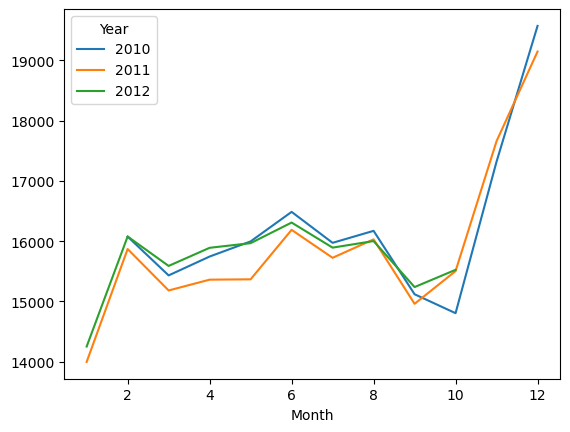

In [36]:
monthly_sales = pd.pivot_table(df, values = "Weekly_Sales", columns = "Year", index = "Month")
monthly_sales.plot()

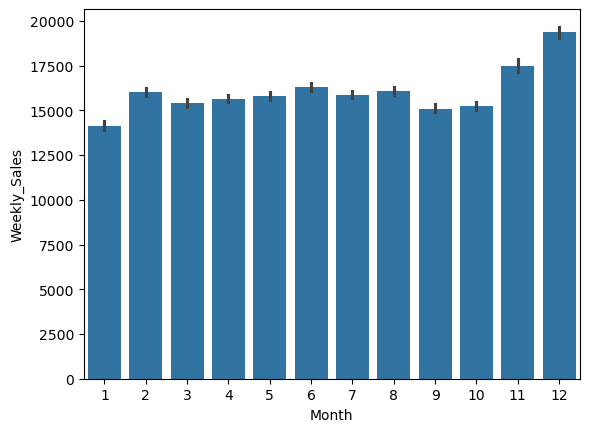

In [38]:
fig = sns.barplot(x='Month', y='Weekly_Sales', data=df)

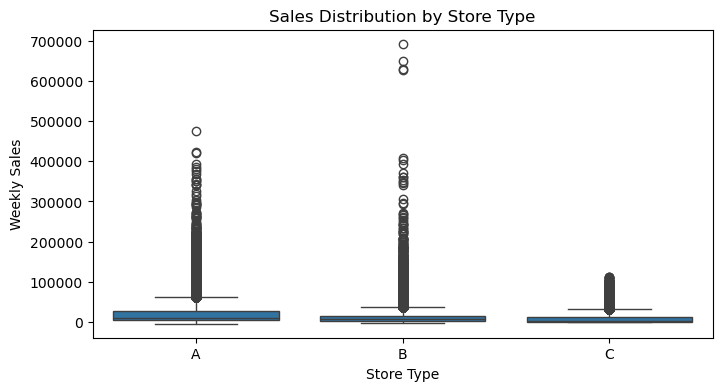

In [149]:
 #Sales by Store Type
plt.figure(figsize=(8, 4))
sns.boxplot(x='Type', y='Weekly_Sales', data=df)
plt.title('Sales Distribution by Store Type')
plt.xlabel('Store Type')
plt.ylabel('Weekly Sales')
plt.show()


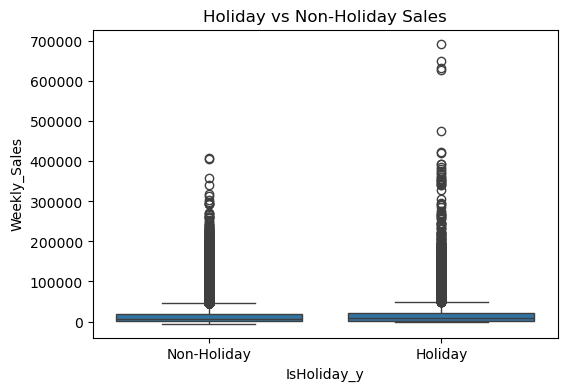

In [163]:
# Impact of holidays
plt.figure(figsize=(6, 4))
sns.boxplot(x='IsHoliday_y', y='Weekly_Sales', data=df)
plt.title('Holiday vs Non-Holiday Sales')
plt.xticks([0, 1], ['Non-Holiday', 'Holiday'])
plt.show()


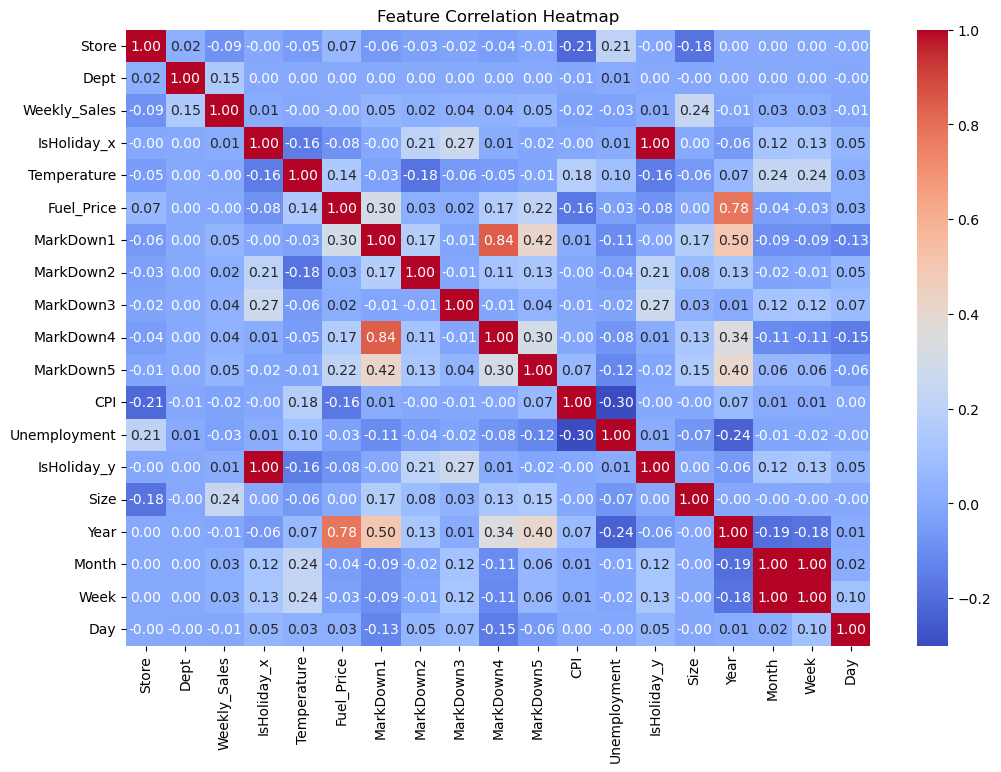

In [165]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()


 # 1. Top Performing Stores

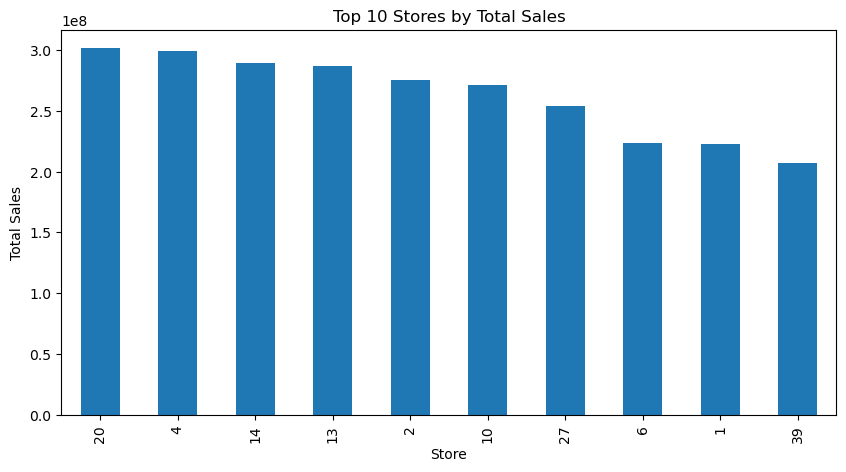

In [70]:
top_stores = df.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False).head(10)
top_stores.plot(kind='bar', figsize=(10, 5), title='Top 10 Stores by Total Sales')
plt.xlabel('Store')
plt.ylabel('Total Sales')
plt.show()


 # 2 Department-wise Sales Trends


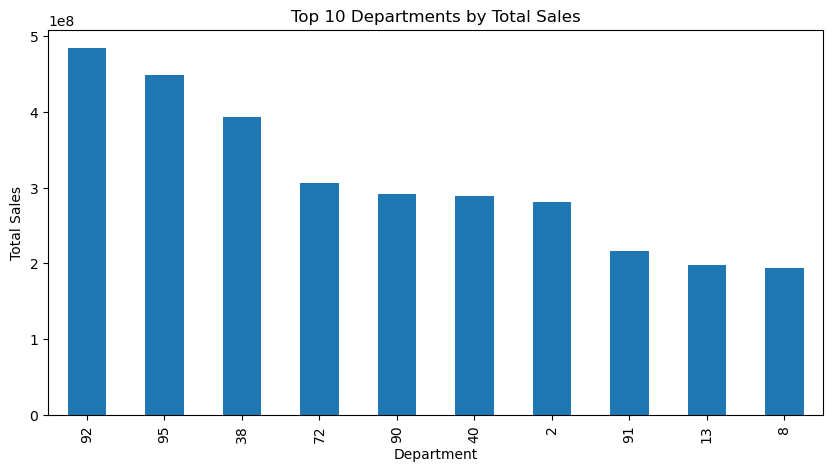

In [73]:
dept_sales = df.groupby('Dept')['Weekly_Sales'].sum().sort_values(ascending=False).head(10)
dept_sales.plot(kind='bar', figsize=(10, 5), title='Top 10 Departments by Total Sales')
plt.xlabel('Department')
plt.ylabel('Total Sales')
plt.show()


# 3. Weekly Sales Trend for a Specific Store

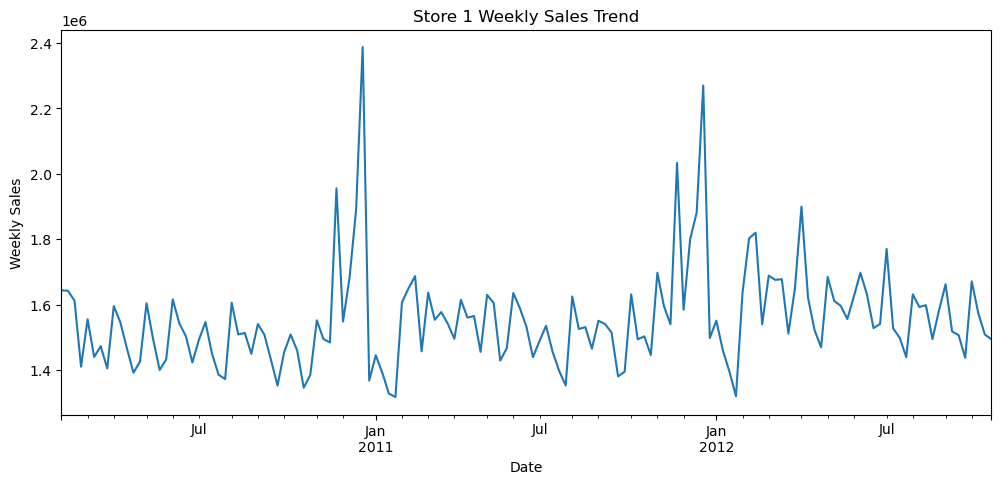

In [75]:
store_id = 1
store_sales = df[df['Store'] == store_id].groupby('Date')['Weekly_Sales'].sum()

plt.figure(figsize=(12, 5))
store_sales.plot()
plt.title(f'Store {store_id} Weekly Sales Trend')
plt.ylabel('Weekly Sales')
plt.show()


## 4. Impact of Fuel Price on Sales

<Axes: xlabel='Fuel_Price'>

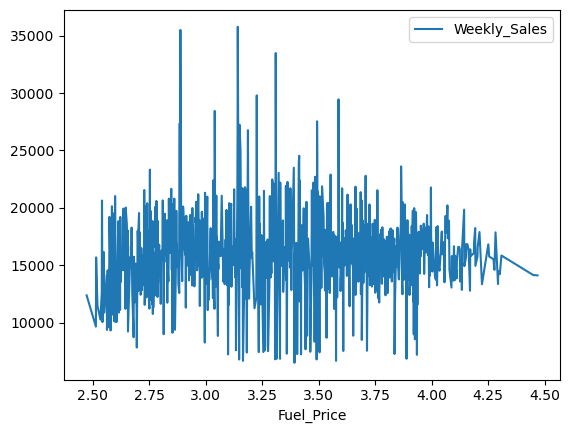

In [42]:
fuel_price = pd.pivot_table(df, values = "Weekly_Sales", index= "Fuel_Price")
fuel_price.plot()

## 5 impact of Temprature  on Sales

<Axes: xlabel='Temperature'>

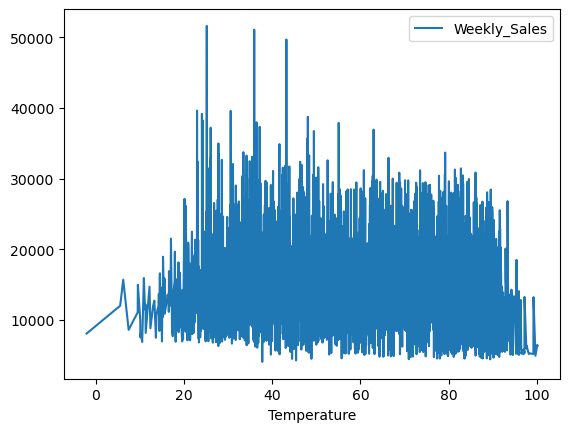

In [45]:
temp = pd.pivot_table(df, values = "Weekly_Sales", index= "Temperature")
temp.plot()

## 6 impact of CPI on Sales

<Axes: xlabel='CPI'>

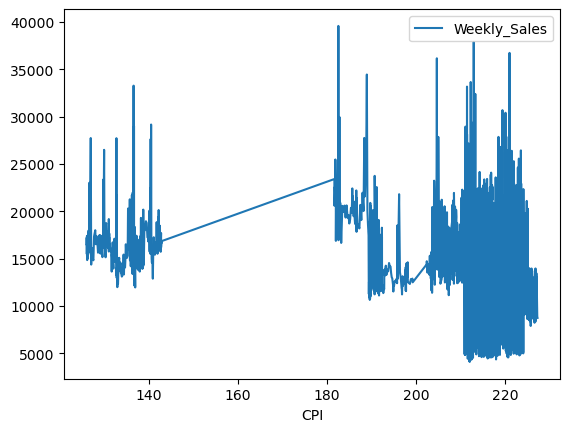

In [48]:
CPI = pd.pivot_table(df, values = "Weekly_Sales", index= "CPI")
CPI.plot()

## 7 impact of Unemployment on sales

<Axes: xlabel='Unemployment'>

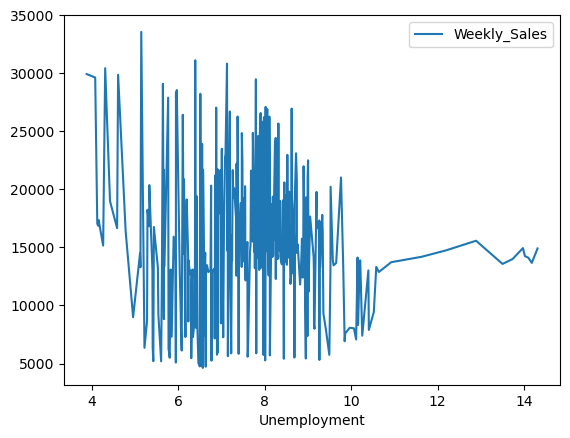

In [51]:
unemployment = pd.pivot_table(df, values = "Weekly_Sales", index= "Unemployment")
unemployment.plot()

In [24]:
stores.groupby('Type').describe()['Size'].round(2)


,count,mean,std,min,25%,50%,75%,max
Type,,,,,,,,
A,22.0,177247.73,49392.62,39690.0,155840.75,202406.0,203819.0,219622.0
B,17.0,101190.71,32371.14,34875.0,93188.00,114533.0,123737.0,140167.0
C,6.0,40541.67,1304.15,39690.0,39745.00,39910.0,40774.0,42988.0


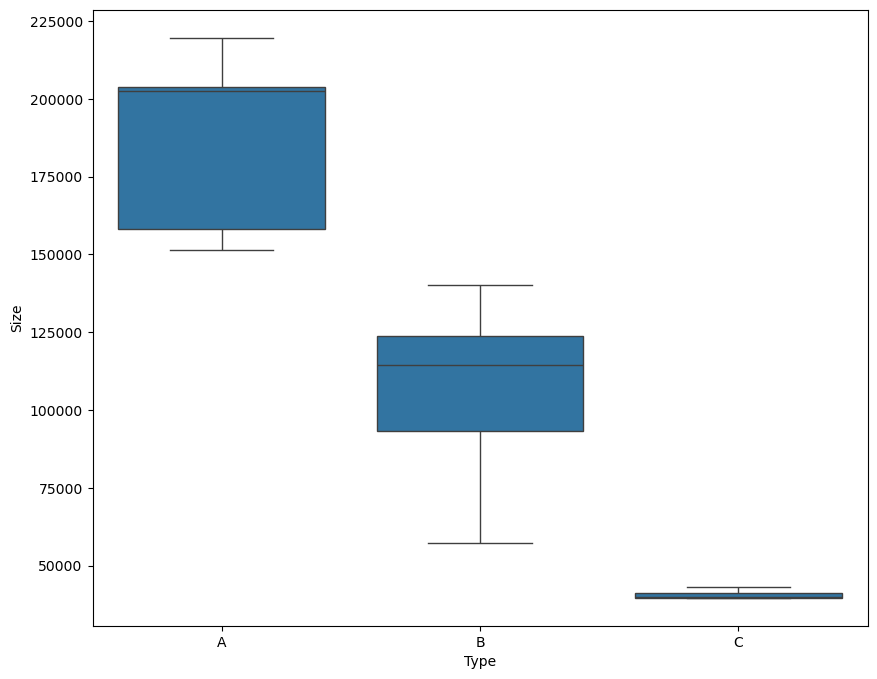

In [26]:
plt.figure(figsize=(10,8))
fig = sns.boxplot(x='Type', y='Size', data=df, showfliers=False)

#  Sales Distribution (Histogram & KDE)


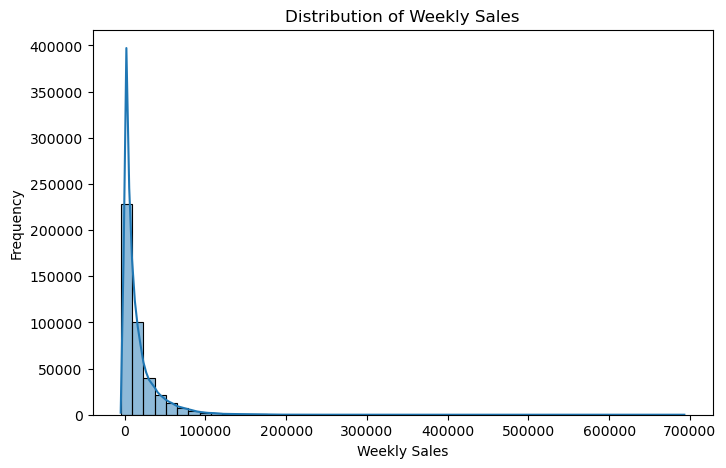

In [84]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Weekly_Sales'], bins=50, kde=True)
plt.title('Distribution of Weekly Sales')
plt.xlabel('Weekly Sales')
plt.ylabel('Frequency')
plt.show()


#  Outlier Detection using Boxplot

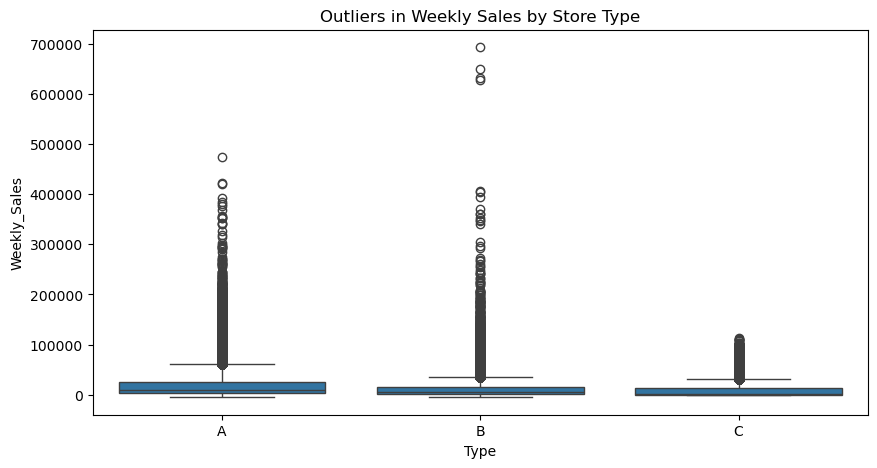

In [167]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Type', y='Weekly_Sales', data=df)
plt.title('Outliers in Weekly Sales by Store Type')
plt.show()


In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 421570 entries, 0 to 421569
Data columns (total 21 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday_x   421570 non-null  bool          
 5   Temperature   421570 non-null  float64       
 6   Fuel_Price    421570 non-null  float64       
 7   MarkDown1     421570 non-null  float64       
 8   MarkDown2     421570 non-null  float64       
 9   MarkDown3     421570 non-null  float64       
 10  MarkDown4     421570 non-null  float64       
 11  MarkDown5     421570 non-null  float64       
 12  CPI           421570 non-null  float64       
 13  Unemployment  421570 non-null  float64       
 14  IsHoliday_y   421570 non-null  bool          
 15  Type          421570 n

## Linear Regression

In [17]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [19]:
features = ['Store', 'Dept','Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'IsHoliday_x','MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5','Size']  # choose based on EDA
X = df[features]
y = df['Weekly_Sales'] 


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [25]:
y_pred = model.predict(X_test)
print("R-squared:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R-squared: 0.08831725606806617
RMSE: 21804.038746702536


In [27]:
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

              Coefficient
Store          -87.106765
Dept           111.304243
Temperature     28.298381
Fuel_Price    -591.418770
CPI            -23.587255
Unemployment  -160.882457
IsHoliday_x    743.868956
MarkDown1        0.000954
MarkDown2        0.001496
MarkDown3        0.106043
MarkDown4        0.012597
MarkDown5        0.089560
Size             0.085776


## Using Non Linear Regression Analysis

## 1)RandomForestRegressor

In [38]:
from sklearn.ensemble import RandomForestRegressor

In [39]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
print("Checkpoint: Cell is running")


Checkpoint: Cell is running


In [36]:
y_pred = model.predict(X_test)

In [37]:
print("R-squared_RFR:", r2_score(y_test, y_pred))
print("RMSE_RFR:", np.sqrt(mean_squared_error(y_test, y_pred)))


R-squared_RFR: 0.9505255528891593
RMSE_RFR: 5079.319743525535


In [48]:
# Feature importance
importances = pd.DataFrame(model.feature_importances_, index=X.columns, columns=["Importance"])
print(importances.sort_values("Importance", ascending=False))

              Importance
Dept            0.620355
Size            0.193435
Store           0.067198
CPI             0.036068
Temperature     0.022535
MarkDown3       0.017470
Fuel_Price      0.016422
Unemployment    0.014764
IsHoliday_x     0.003389
MarkDown5       0.002332
MarkDown4       0.002303
MarkDown2       0.001932
MarkDown1       0.001797


## 2)HistGradientBoostingRegresssor

In [51]:
from sklearn.ensemble import HistGradientBoostingRegressor
model = HistGradientBoostingRegressor( max_iter=200,
    learning_rate=0.05,
    max_depth=8,
    random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


In [53]:
print("R-squared_HGBR:", r2_score(y_test, y_pred))
print("RMSE_HGBR:", np.sqrt(mean_squared_error(y_test, y_pred))) 

R-squared_HGBR: 0.8800878282396056
RMSE_HGBR: 7907.636768720554


## 3)Decision Tree Regressor

In [61]:
from sklearn.tree import DecisionTreeRegressor

In [90]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


In [91]:
print("R-squared:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R-squared: 0.9162049773647777
RMSE: 6610.345955530897


## 4) Bayesian Ridge

In [68]:
from sklearn.linear_model import BayesianRidge

In [70]:
model = BayesianRidge()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [72]:
print("R-squared:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


R-squared: 0.08833045321327626
RMSE: 21803.8809329736


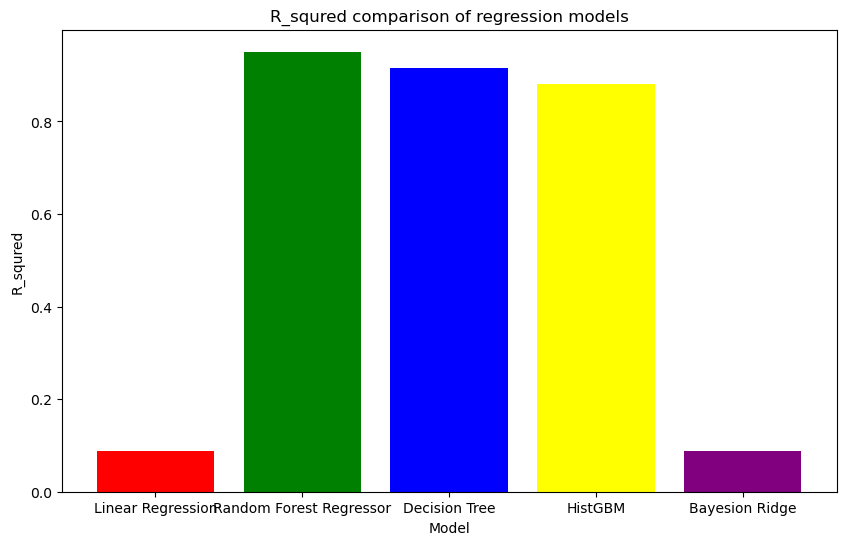

In [96]:
r2_scored={
    'Linear Regression':0.08831725606806617
     ,'Random Forest Regressor': 0.9505255528891593
    ,'Decision Tree':0.9162049773647777
    ,'HistGBM':0.8800878282396056
    ,'Bayesion Ridge': 0.08833045321327626

}
plt.figure(figsize=(10,6))
plt.bar(r2_scored.keys(),r2_scored.values(),color=['red','green','blue','yellow','purple'])
plt.xlabel('Model')
plt.ylabel('R_squred')
plt.title('R_squred comparison of regression models')
plt.show()

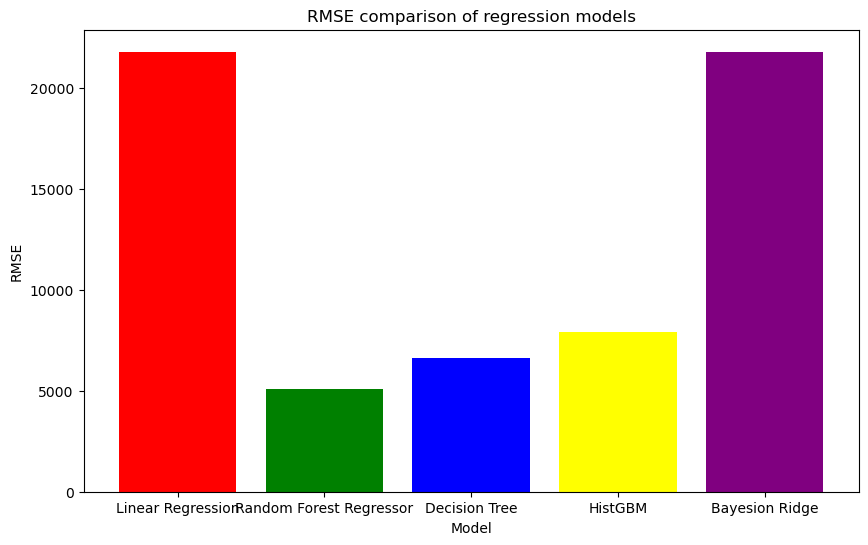

In [98]:
RMSE={
    'Linear Regression':21804.038746702536
     ,'Random Forest Regressor':5079.319743525535 
    ,'Decision Tree':6610.345955530897
    ,'HistGBM':7907.636768720554
    ,'Bayesion Ridge':21803.8809329736 

}
plt.figure(figsize=(10,6))
plt.bar(RMSE.keys(),RMSE.values(),color=['red','green','blue','yellow','purple'])
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.title('RMSE comparison of regression models')
plt.show()